In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler,\
OneHotEncoder, LabelEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv('FoodPrice_in_Turkey.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [4]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [10]:
# kiểm tra dữ liệu bị khuyết
df.isna()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7376,False,False,False,False,False,False,False,False
7377,False,False,False,False,False,False,False,False
7378,False,False,False,False,False,False,False,False
7379,False,False,False,False,False,False,False,False


# Xử lý dữ liệu ngoại lai

<AxesSubplot:xlabel='Price'>

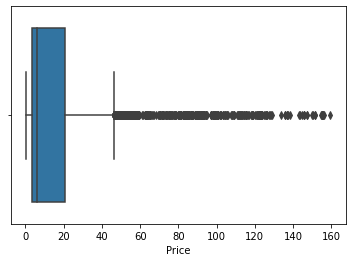

In [32]:
# Xử lý dữ liệu ngoại lai ở cột Price
# sns.kdeplot(data=df['Price'])
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='Price'>

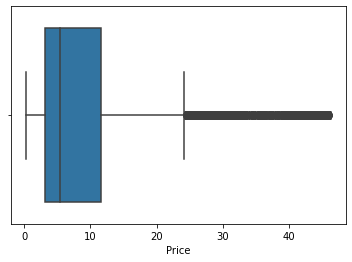

In [39]:
# Chuẩn hóa dữ liệu bằng phương pháp IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3-Q1
df_s = df[~((df['Price'] < (Q1 - IQR * 1.5)) | (df['Price'] > (Q3 + IQR * 1.5)))]
sns.boxplot(x=df_s['Price'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

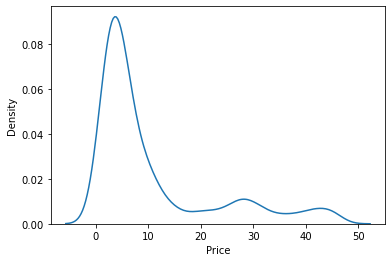

In [40]:
# Biểu đồ phân bố dữ liệu
sns.kdeplot(data=df_s['Price'])

<AxesSubplot:>

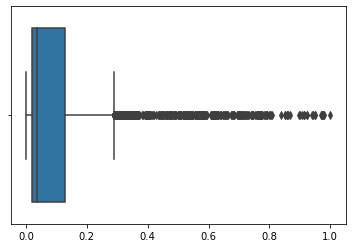

In [57]:
# Chuẩn hóa dữ liệu bằng MinMaxScaler
mms = MinMaxScaler()
df_mms = mms.fit_transform(df[['Price']])
sns.boxplot(x=df_mms)

<AxesSubplot:>

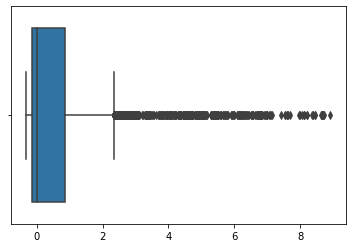

In [58]:
# Chuẩn hóa dữ liệu bằng RobustScaler
rbs = RobustScaler()
df_rbs = rbs.fit_transform(df[['Price']])
sns.boxplot(x=df_rbs)

# Mã hóa dữ liệu

In [64]:
# các giá trị ở cột ProductName
product_names = df['ProductName'].unique()
print(product_names)

['Rice - Retail' 'Wheat flour - Retail' 'Beans (white) - Retail'
 'Potatoes - Retail' 'Eggs - Retail' 'Meat (chicken) - Retail'
 'Sugar - Retail' 'Garlic - Retail' 'Lentils - Retail' 'Pasta - Retail'
 'Tomatoes - Retail' 'Groundnuts (shelled) - Retail'
 'Bread (common) - Retail' 'Coffee - Retail' 'Onions - Retail'
 'Tea (green) - Retail' 'Cabbage - Retail' 'Meat (mutton) - Retail'
 'Oil (sunflower) - Retail' 'Salt - Retail' 'Coffee (instant) - Retail'
 'Peas (green, dry) - Retail' 'Apples (red) - Retail'
 'Cauliflower - Retail' 'Cucumbers (greenhouse) - Retail'
 'Oil (olive) - Retail' 'Chickpeas - Retail' 'Bananas - Retail'
 'Bulgur - Retail' 'Tea - Retail' 'Fuel (petrol-gasoline) - Retail'
 'Transport (public) - Retail' 'Tomatoes (paste) - Retail'
 'Fuel (gas) - Retail' 'Apples - Retail' 'Oranges - Retail'
 'Yogurt - Retail' 'Bread (pita) - Retail' 'Cucumbers - Retail'
 'Fish (fresh) - Retail' 'Spinach - Retail' 'Cheese - Retail'
 'Meat (veal) - Retail' 'Eggplants - Retail'
 'Milk (po

In [71]:
# mã hóa cột ProductName với One-hot encoder
encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(np.asarray(product_names).reshape(-1,1))
onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
# mã hóa cột ProductName với One-hot encoder sử dụng pandas
pd.get_dummies(df['ProductName'])

,Apples (red) - Retail,Apples - Retail,Bananas - Retail,Beans (white) - Retail,Bread (common) - Retail,Bread (pita) - Retail,Bulgur - Retail,Cabbage - Retail,Cauliflower - Retail,Cheese - Retail,...,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Transport (public) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# mã hóa cột ProductName với Label encoder
encoder = LabelEncoder()
# encoder.fit_transform(df['ProductName'])

encoded_data = encoder.fit_transform(np.asarray(df['ProductName']))
encoded_data

array([37, 37, 37, ..., 11, 11, 11])

In [78]:
# mã hóa cột ProductName với Label encoder sử dụng pandas
df['ProductName'].astype('category').cat.codes

0       37
1       37
2       37
3       37
4       37
        ..
7376    11
7377    11
7378    11
7379    11
7380    11
Length: 7381, dtype: int8

# Rời rạc hóa dữ liệu

In [84]:
# Rời rạc hóa dữ liệu ở cột Price
# chia thành 5 khoảng giá trị có độ dài bằng nhau
df2 = df['Price']
cats = pd.cut(df2,5)
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

(0.0947, 32.092]      6223
(32.092, 63.931]       867
(63.931, 95.769]       155
(95.769, 127.607]      105
(127.607, 159.446]      31
Name: Price, dtype: int64

In [85]:
# chia thành 5 phần có số lượng phần tử tương đương nhau
cats2 = pd.qcut(df2,5)
cats2

In [79]:
df

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985
